Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



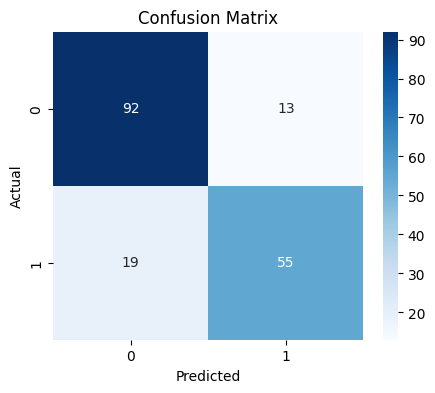

Prediction: Did Not Survive


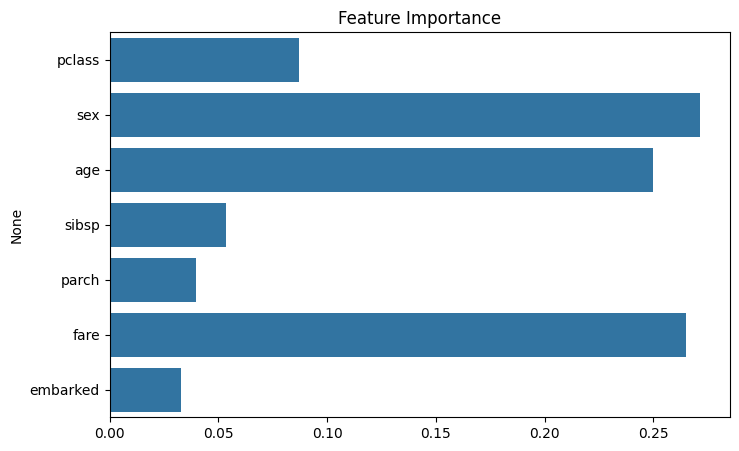

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], axis=1)
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])

label_encoder = LabelEncoder()
titanic_data['sex'] = label_encoder.fit_transform(titanic_data['sex'])
titanic_data['embarked'] = label_encoder.fit_transform(titanic_data['embarked'])

X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

custom_passenger = pd.DataFrame({
    'pclass': [3],
    'sex': [1],
    'age': [22],
    'sibsp': [1],
    'parch': [0],
    'fare': [7.25],
    'embarked': [0]
})

prediction = model.predict(custom_passenger)[0]
print("Prediction:", "Survived" if prediction == 1 else "Did Not Survive")

plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()
